In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#数据读入
data_lm = pd.read_table('source/0430.txt',encoding='GBK')
data_tm = pd.read_table('source/0520.txt',encoding='GBK')
kuandai = pd.concat([data_lm,data_tm])
zhendi_map = pd.read_csv('zddyb.csv',encoding='GBK')
#匹配阵地对应表
kuandai = kuandai.merge(zhendi_map, 'left', on=['销售渠道','渠道明细'])

In [3]:
#创建中间表
kd_tm = kuandai.loc[kuandai['入网时间']//100 == 201805]#本月数据
kd_lm = kuandai.loc[(kuandai['入网时间']//100 == 201804)&(kuandai['入网时间'] % 100 <= 20)]#上月数据
ec_tm = kd_tm.loc[kd_tm['十六大渠道'] == '电子渠道']#本月电子渠道数据
ec_lm = kd_lm.loc[kd_lm['十六大渠道'] == '电子渠道']#上月电子渠道数据

In [4]:
#电子渠道的全省阵地分析
zd_tm = ec_tm.groupby('阵地')['统计值'].sum()
zd_lm = ec_lm.groupby('阵地')['统计值'].sum()
zd_fx = pd.concat([zd_lm,zd_tm],axis=1)
zd_fx.columns=['4月','5月']
zd_fx.sort_values('5月',ascending=False, inplace=True)
zd_fx

,4月,5月
地市网厅,8714.0,7357.0
地市分销,4221.0,4156.0
省网厅,601.0,543.0
外呼导购,320.0,336.0
装维毛细,202.0,232.0
省分销,NaN,15.0


In [5]:
#结合第一节的结果，进一步分析分公司的阵地情况
rst = ec_tm.groupby('分公司')['统计值'].sum()
rst.name = '发展量'
rst_huanbi = rst / ec_lm.groupby('分公司')['统计值'].sum()
rst_huanbi.name = "环比"
rst_zhanbi = rst / kd_tm.groupby('分公司')['统计值'].sum()
rst_zhanbi.name = "渠道占比"
result = pd.concat([rst,rst_huanbi,rst_zhanbi],axis=1)
result.sort_values('环比',ascending=False)

,发展量,环比,渠道占比
分公司,,,
清远,32.0,1.684211,0.004692
湛江,13.0,1.444444,0.002500
中山,1270.0,1.392544,0.091144
肇庆,29.0,1.260870,0.005881
惠州,840.0,1.142857,0.075696
佛山,263.0,1.091286,0.012738
梅州,27.0,1.038462,0.004713
广州,1469.0,1.034507,0.030841
深圳,3647.0,0.967887,0.085430


In [6]:
tem1 = ec_tm.groupby(['分公司','阵地'])['统计值'].sum()
tem2 = ec_lm.groupby(['分公司','阵地'])['统计值'].sum()
zhendi_change = tem1.sub(tem2,fill_value=0)#每个地市阵地发展量变化，na值不能运算，因此不能直接减，要使用sub
zhendi_change=zhendi_change.groupby("分公司").agg(['idxmax','idxmin'])#每个地市增长最大及最小的阵地
zhendi_change.columns=['增长最快','增长最慢']
zhendi_change=zhendi_change.applymap(lambda x:x[1])
zhendi_change

,增长最快,增长最慢
分公司,,
东莞,省网厅,地市网厅
中山,省网厅,地市网厅
云浮,省网厅,省网厅
佛山,外呼导购,地市网厅
广州,省网厅,地市分销
惠州,地市网厅,装维毛细
揭阳,省网厅,外呼导购
梅州,省网厅,外呼导购
汕头,省网厅,地市网厅


In [7]:
result = pd.concat([result,zhendi_change],axis=1)
result.sort_values('环比',ascending=False)

,发展量,环比,渠道占比,增长最快,增长最慢
分公司,,,,,
清远,32.0,1.684211,0.004692,外呼导购,装维毛细
湛江,13.0,1.444444,0.002500,省网厅,地市网厅
中山,1270.0,1.392544,0.091144,省网厅,地市网厅
肇庆,29.0,1.260870,0.005881,地市网厅,外呼导购
惠州,840.0,1.142857,0.075696,地市网厅,装维毛细
佛山,263.0,1.091286,0.012738,外呼导购,地市网厅
梅州,27.0,1.038462,0.004713,省网厅,外呼导购
广州,1469.0,1.034507,0.030841,省网厅,地市分销
深圳,3647.0,0.967887,0.085430,地市分销,省网厅


In [8]:
rst_lm = ec_lm.groupby('分公司')['统计值'].sum()
rst_cat = pd.concat([rst_lm,rst],axis=1)
rst_plot = rst_cat.sort_values('发展量',ascending=False)[:5]
rst_plot

,统计值,发展量
东莞,6961.0,6193.0
深圳,3768.0,3647.0
广州,1420.0,1469.0
中山,912.0,1270.0
惠州,735.0,840.0


In [9]:
zd_everyday = ec_tm.groupby(['阵地','入网时间'])['统计值'].sum()
zd = ['地市分销', '地市网厅', '省网厅', '装维毛细', '外呼导购', '省分销']

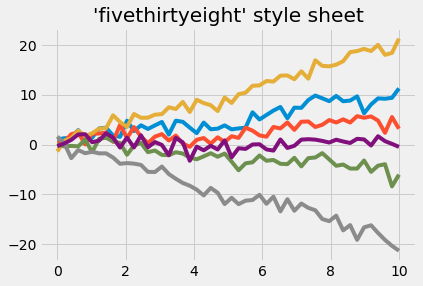

In [11]:
import numpy as np
plt.style.use('fivethirtyeight')
x = np.linspace(0, 10)
fig, ax = plt.subplots()
np.random.seed(19680801)
ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

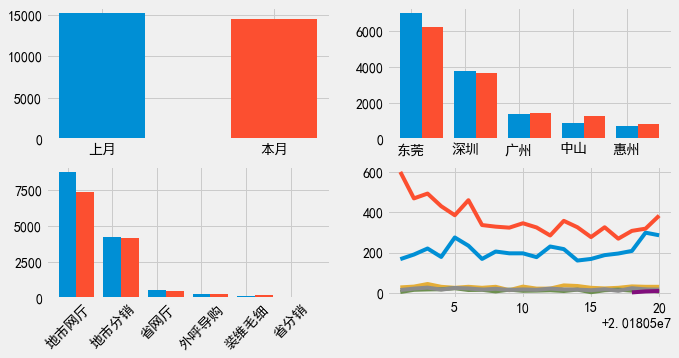

In [17]:
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
matplotlib.rcParams['font.family']='SimHei'
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,5))
ax1, ax2, ax3, ax4 = axes.ravel()

#全省本月、上月对比
y1 = ec_lm['统计值'].sum()
y2 = ec_tm['统计值'].sum()
ax1.bar(1,y1,0.5)
ax1.bar(2,y2,0.5)
ax1.set_xticks([1,2])
ax1.set_xticklabels(['上月','本月'])
#各地市发展量
x = np.arange(5)
width = 0.4
y1 = rst_plot.iloc[:,0].values
y2 = rst_plot.iloc[:,1].values
ax2.bar(x,y1,width)
ax2.bar(x+width,y2,width)
ax2.set_xticks(x)
ax2.set_xticklabels(rst_plot.index)
#各阵地本月、上月对比
x = np.arange(6)
y1=zd_fx['4月']
y2=zd_fx['5月']
ax3.bar(x,y1,width)
ax3.bar(x+width,y2,width)
ax3.set_xticks(x)
ax3.set_xticklabels(zd_fx.index,rotation =45)
#个阵地分天入网量
x = np.arange(20)
for zhendi in zd:
    ax4.plot(zd_everyday.loc[zhendi],label=zhendi)
plt.show()

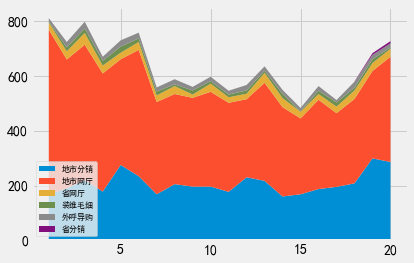

In [13]:
plt.style.use('fivethirtyeight')
all_y = []
x = np.arange(1,21)
for zhendi in zd:
    y = zd_everyday[zhendi].reindex(np.arange(20180501,20180521))
    all_y.append(y)
plt.stackplot(x,all_y,labels=zd)
plt.legend(loc='lower left',fontsize=8)
plt.show()